# Introduction
In this project I will use some of the most famous Python's libraries for data visualization such as Pandas, Matplotlib and Seaborn. The aim is to do some exploratory data analysis from real world dataset taken from the web.

In the first project, there will be examinated some 911 calls made from Montgomery County, PA, data were taken from [Kaggle](https://www.kaggle.com/).

In the latest I used data taken from *Stooq* an online free repository of financial data, in order to investigate stock prices of some of the most important US banks during the financial crysis started in 2007-2008. 

# 911 Calls Project 

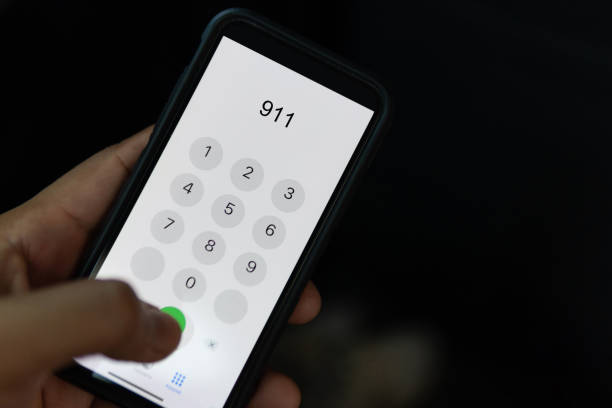


In this project there will be analized some 911 calls data. The dataset was taken from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) and it contains the following fields:

* **lat** : Latitude, *String variable*
* **lng**: Longitude, *String variable*
* **desc**: Description of the Emergency Call, *String variable*
* **zip**: Zipcode, *String variable*
* **title**: Title, *String variable*
* **timeStamp**: YYYY-MM-DD HH:MM:SS, *String variable*
* **twp**: Township, *String variable*
* **addr**: Address, *String variable*
* **e**: Dummy variable (always 1)



## Data and Setup

____
###Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Exploring

In [ ]:
df = pd.read_csv('911.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [ ]:
# top 5 zip codes 
df['zip'].value_counts().head(5) 

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [ ]:
# top 5 townships
df['twp'].value_counts().head(5) 

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [ ]:
# number of unique reason for 911 calls
df['title'].nunique()  

110

### Adding new features

It could be helpful to split the '*title*' column in order to isolate the reason why the calls were made



In [ ]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [ ]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)


It can be seen that there were only 3 main reasons



In [ ]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

The most common cause is EMS: Emergency Medical Services

## Exploratory Data Analysis

### Plots

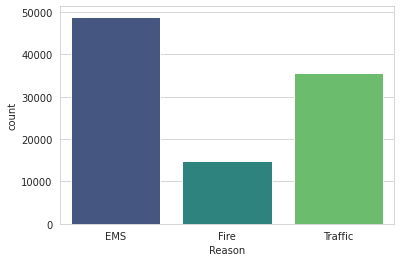

In [ ]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [ ]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# datetime conversion of timeStamp column
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In order to do some time analysis it is convenient to add 3 more time columns from timeStamp: '*Day of week*', '*Month*' and '*Hour*'.

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


Converting *day of week* column from integer to a string object

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

Seaborn's count plots were used to create plots of calls made vs Day of Week column and vs *Month*. In both of cases with the hue based off of the Reason column.

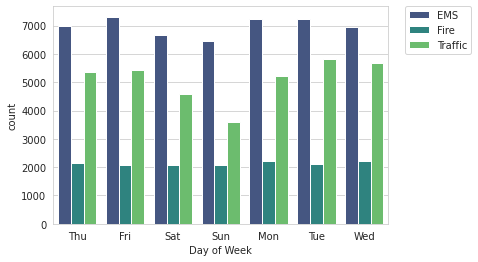

In [ ]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

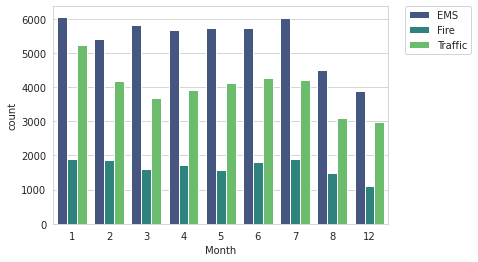

In [ ]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From the plots it can be seen that actually some months are missing. In particular 9, 10, 11. It is possible to have some informations from these missing data through a continuos plot (although interpolated). 

In [ ]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Text(0, 0.5, 'Counts')

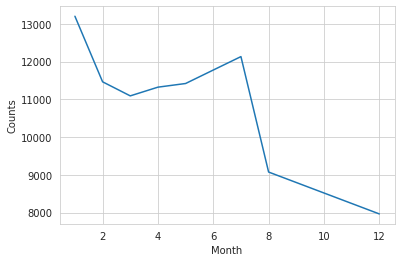

In [ ]:
# Linear plot from matplotlib's pyplot
byMonth['twp'].plot()
plt.ylabel('Counts')

Let's see how the counts vary with months through a linear plot

Text(5.174999999999997, 0.5, 'Counts')

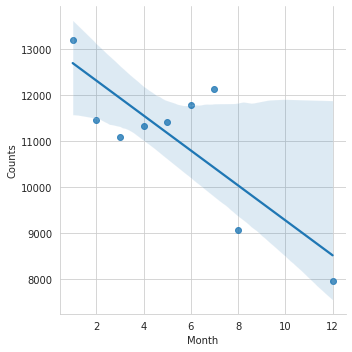

In [ ]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
plt.ylabel('Counts')

Creating a new column call '*Date*' that contains dates from the '*timeStamp*' column and plotting 911 calls against it. In particular 4 cases were investigated: the general one, Traffic, Fire and EMS.




In [ ]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

Text(24.125, 0.5, 'Counts')

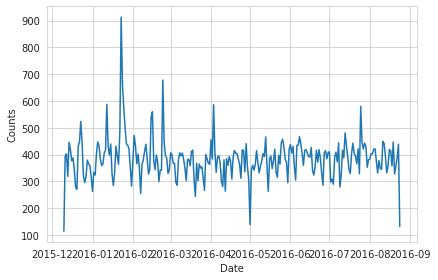

In [ ]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.ylabel('Counts')


Text(24.125, 0.5, 'Counts')

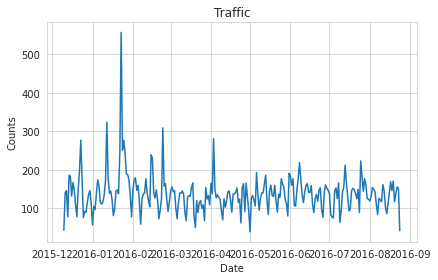

In [ ]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.ylabel('Counts')

Text(24.0, 0.5, 'Counts')

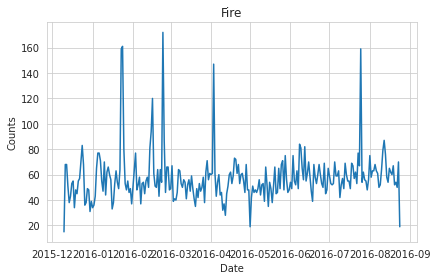

In [ ]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()
plt.ylabel('Counts')

Text(23.875, 0.5, 'Counts')

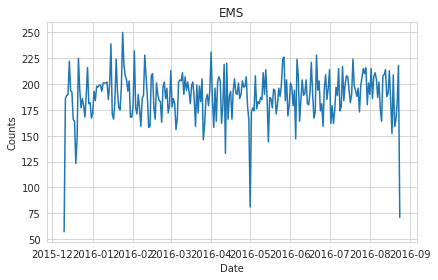

In [ ]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()
plt.ylabel('Counts')

### Heatmaps

Let's move on creating heatmaps using Seaborn. First, it is needed to restructure the dataframe so that the columns become the hours and the index becomes the day of the week

In [ ]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


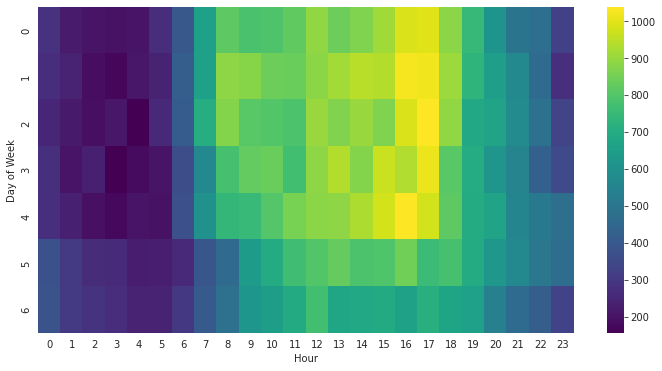

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

- Calls are more frequent in daily hours
- There are less calls in weekend

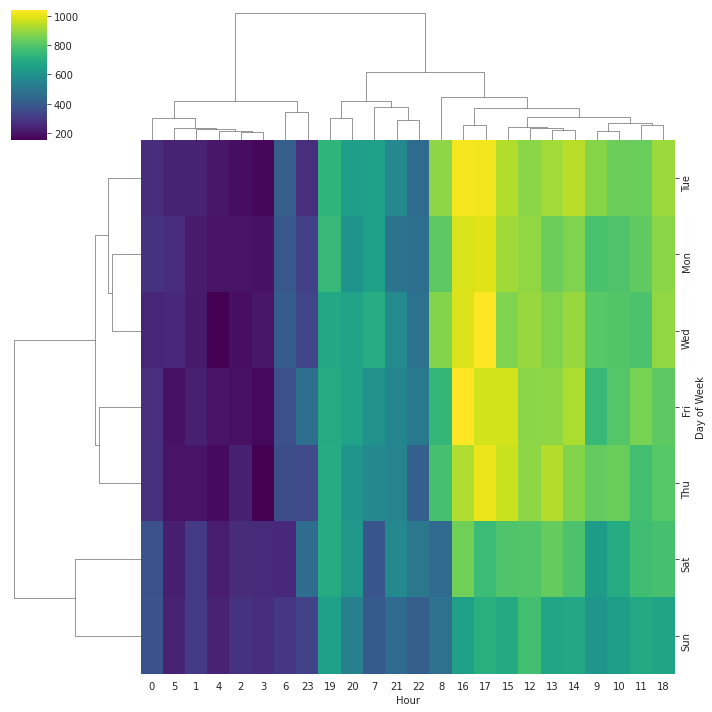

In [ ]:
sns.clustermap(dayHour,cmap='viridis')

In [ ]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


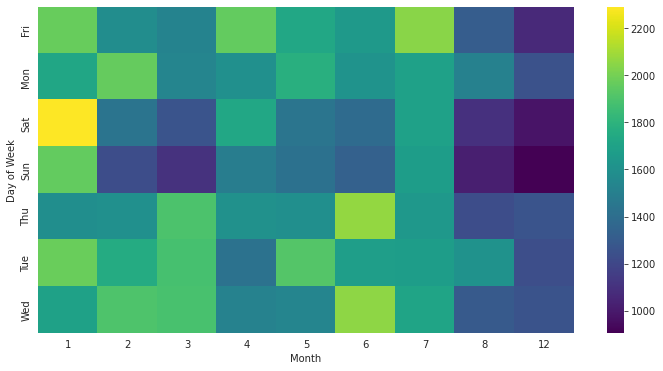

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

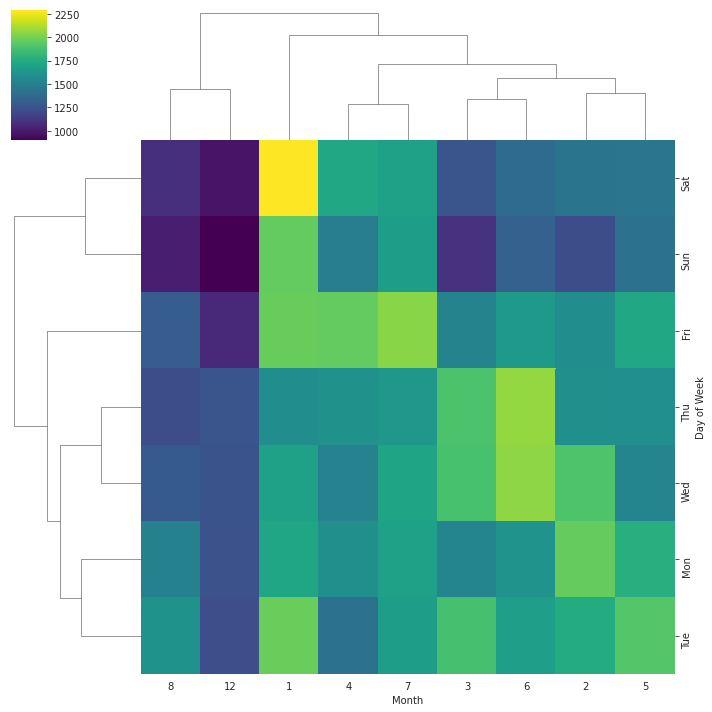

In [ ]:
sns.clustermap(dayMonth,cmap='viridis')

# Finance Data Project


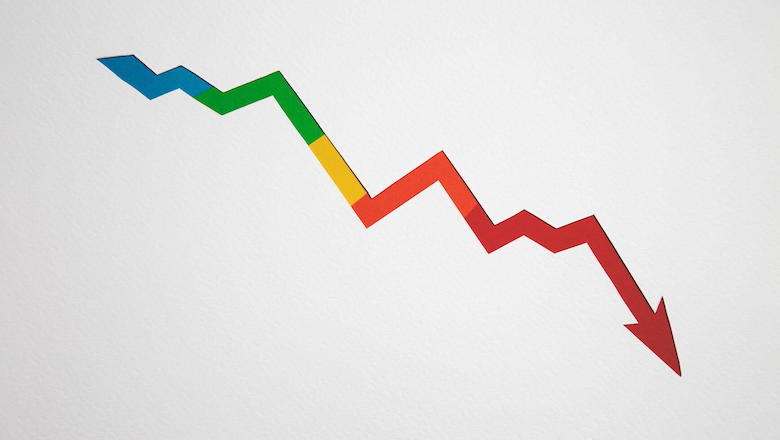

This data project will focus on exploratory data analysis of bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In this project data were taken using Pandas datareader, getting stock information in the period from Jan 1st 2006 to Jan 1st 2016 for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Particularly, stock data were taken from an online free repository called *Stooq*.

## Imports




###Libraries imports


In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sbn
import matplotlib.pyplot as plt

sbn.set_style('whitegrid')
%matplotlib inline

### Data Import



In [ ]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [ ]:
## Imports of dataframes

# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [ ]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

Formatting data to a proper layout dataframe

In [ ]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

## Exploratory Data Analysis


In [ ]:
# max Close price for each bank's stock throughout the time period
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$


Technically it will be used *pct_change()* method on the Close column to create a column representing this return value.

In [ ]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


### Plot

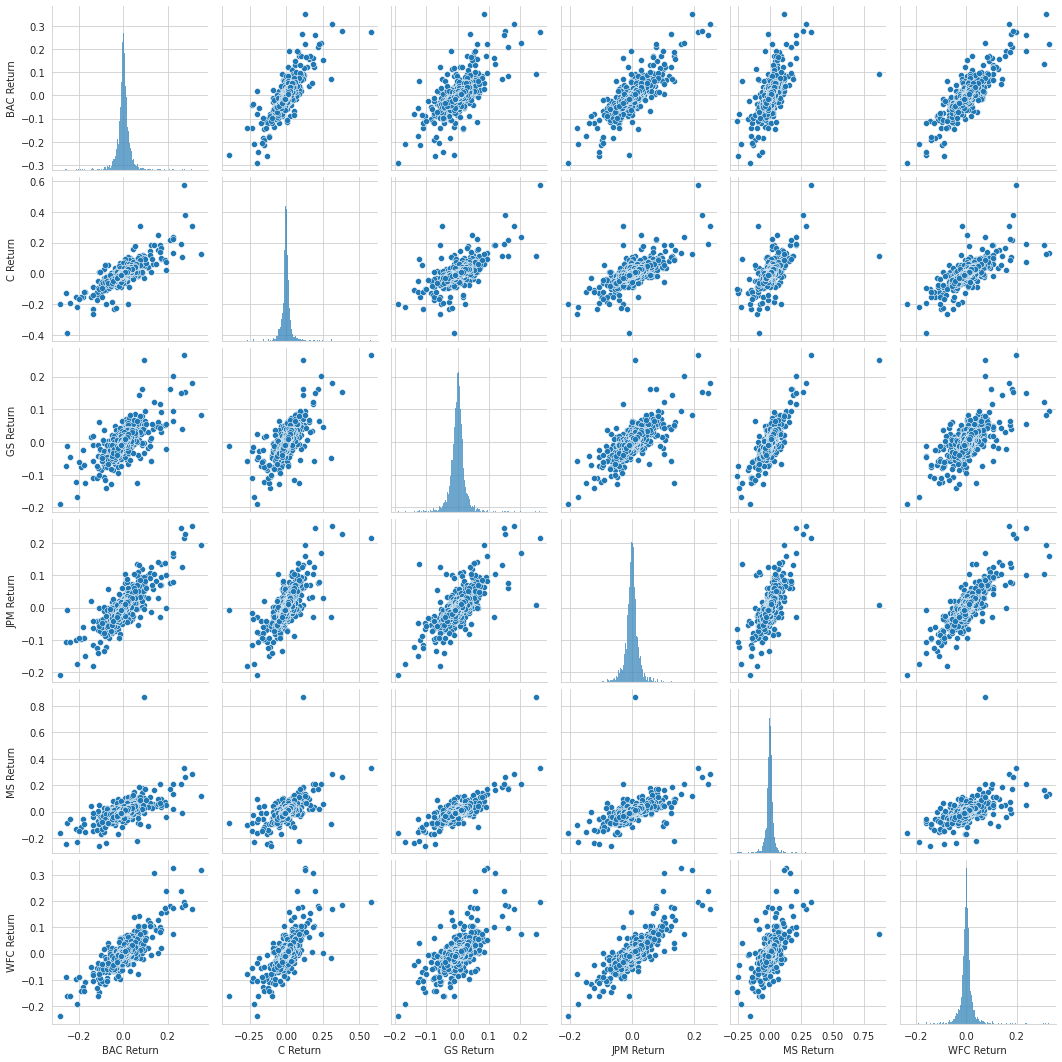

In [ ]:
import seaborn as sns
sns.pairplot(returns)

In [ ]:
# Worst Drop 
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [ ]:
# Best Single Day Gain
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

Taking a look at the standard deviation of the returns, it is possible to classify the riskiest bank over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [ ]:
returns.std() # MS riskiest

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

In [ ]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


In [ ]:
#Risk profiles over 2015, the riskiest are Morgan Stanley and BAC
returns['Date'] = returns.index
returns_min = returns[returns['Date']>'2015-01-01']
returns_parsed = returns_min[returns_min['Date']<'2015-12-31']
returns_parsed.std()

BAC Return                        0.01616
C Return                         0.015296
GS Return                        0.014043
JPM Return                       0.013981
MS Return                        0.016019
WFC Return                       0.012555
Date          104 days 10:04:54.111095390
dtype: object

Distplot using seaborn of the 2015 returns for Morgan Stanley 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


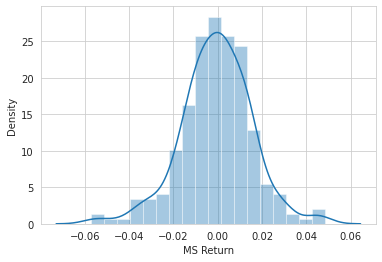

In [ ]:
returns['Year'] = pd.DatetimeIndex(returns['Date']).year
sbn.distplot(returns['MS Return'][returns['Year'] == 2015])


Distplot using seaborn of the 2008 returns for CitiGroup 

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


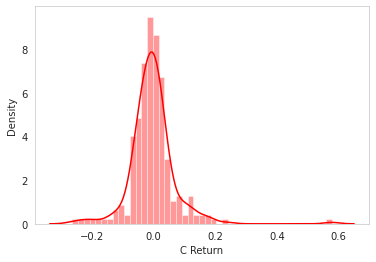

In [ ]:
sbn.distplot(returns['C Return'][returns['Year'] == 2008], color = 'red')
plt.grid()

Plot showing Close price for each bank for the entire index of time

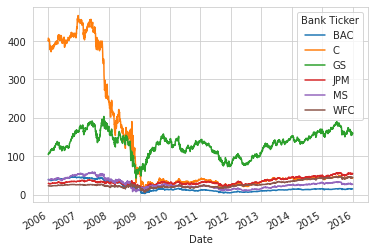

In [ ]:
for bt in tickers:
  bs = bank_stocks.xs('Close', axis = 1, level = 'Stock Info')[bt]
  
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

Let's analyze the moving averages for these stocks in the year 2008. 


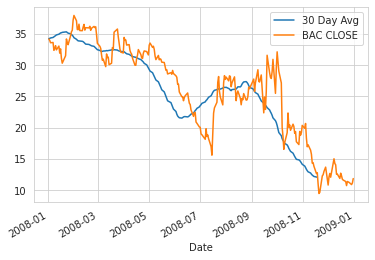

In [ ]:
BAC['Date'] = BAC.index
BAC['Year'] = BAC['Date'].apply(lambda x: x.year)
BAC[BAC['Year'] == 2008]['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC[BAC['Year'] == 2008]['Close'].plot(label='BAC CLOSE')

plt.legend()

### Heatmaps

Heatmap of the correlation between the stocks Close Price

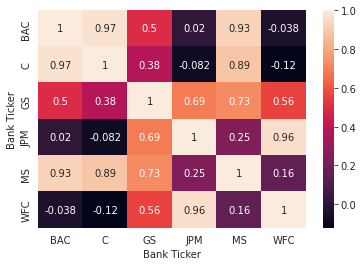

In [ ]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Seaborn's clustermap to cluster the correlations together

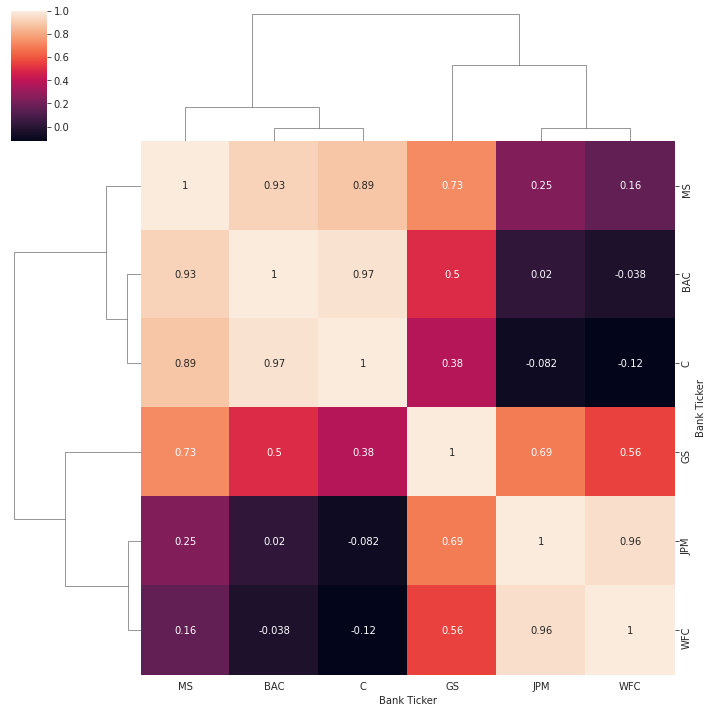

In [ ]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)